# Degree Class Predictive System for Salem University Undergraduates

This notebook follows a data science approach to design and implement a degree class predictive system for Salem University undergraduate students using machine learning.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from joblib import dump

In [ ]:
# Load the dataset
file_path = '/content/merged_df.xlsx'
dataset = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("Data Head:")
dataset.head()
# print(data.head())

Data Head:


,FULL NAME,STUDENT ID,EMAIL ADDRESS,AGE,GENDER,NATIONALITY,WHAT WAS YOUR AVERAGE GRADE IN HIGH SCHOOL,WHAT TYPE OF SCHOOL DID YOU ATTEND,HAVE YOU EVER TAKEN A GAP BEFORE STARTING YOUR DEGREE,ACADEMIC HONOURS RCEIVED,...,HOW DO YOU STAY MOTIVATED DURING CHALLENGING TIMES,HOW DO YOU MANAGE STRESS,HOW WOULD YOU RATE YOUR MENTAL HEALTH,HOW WOULD YOU RATE YOUR OVERALL HEALTH,HOW COMFORTABLE ARE YOU USING TECHNOLOGY,LIBARRY ATTENDANCE,CHAPEL ATTENDANCE,ANY SUGGESTON FOR IMPROVING STUDENT SUCCESS,LIBRARY ATTENDANCE,ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS
0,ABAH JOSHUA,SU22202001,joshuah@gmail.com,19 years,MALE,NIGERIA,C GRADE,PRIVATE,YES,NONE,...,BY KEEP PUSHING,SLEEPING,A GOOD ONE,A GOOD ONE,0.77,0.7,0.6,A BETTER FORM OF A GOOD LEARNING ENVIRONMENT,NaN,NaN
1,AJAYI BASIL,SU20111007,ajbasil8@gmail.com,20 years,MALE,NIGERIA,B GRADE,PRIVATE,YES,NONE,...,JUST KEEP GRINDING,MUSIC AND ANIME,A GOOD ONE,A GOOD ONE,0.8,0.8,0.91,--------,NaN,NaN
2,OGEDEGBE IKHIONOSIMHE MANFREAD,SU21098821,ogedegebeikoinoshimhe@gmail.com,17 years,MALE,NIGERIA,A GRADE,PRIVATE,NO,NONE,...,PRAYERS,ITS STRESSFUL TO MANAGE,A BAD ONE,A GOOD ONE,0.9,0.93,0.96,GOOD SOCIALIZATION AMONGS STUDENTS IN AND OUT ...,NaN,NaN
3,JOSEPH DANLADI FIKI,SU22202002,fikijoseph427@gmail.com,17 years,MALE,NIGERIA,C GRADE,PRIVATE,NO,BEST IN CLASS,...,ALWAYS REMBERING THERE'S STILL GOD,SLEEPING,A GOOD ONE,A GOOD ONE,0.97,0.3,0.55,BY MAKING SURE STUDENTS ARE INVOVLED IN READING,NaN,NaN
4,JESSSE JADUA JOHN,SU22111004,ij7499064@gmail.com,19 years,MALE,NIGERIA,B GRADE,PRIVATE,NO,BEST IN ART,...,REMBERING GOD STILL EXIST,SLEEPING OR LISTENING TO MUSIC,A GOOD ONE,A VERY GOOD ONE,1,0.8,0.87,--------,NaN,NaN


In [ ]:
# Display basic information about the dataset
print("\nData Info:")
print(dataset.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 37 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   FULL NAME                                                                     1050 non-null   object 
 1   STUDENT ID                                                                    1050 non-null   object 
 2   EMAIL ADDRESS                                                                 1050 non-null   object 
 3   AGE                                                                           1050 non-null   object 
 4   GENDER                                                                        1050 non-null   object 
 5   NATIONALITY                                                                   1050 non-null   object 
 6   WHAT WAS YOUR AVERAG

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
FULL NAME                                                                        0
STUDENT ID                                                                       0
EMAIL ADDRESS                                                                    0
AGE                                                                              0
GENDER                                                                           0
NATIONALITY                                                                      0
WHAT WAS YOUR AVERAGE GRADE IN HIGH SCHOOL                                       0
WHAT TYPE OF SCHOOL DID YOU ATTEND                                               0
HAVE YOU EVER TAKEN A GAP BEFORE STARTING YOUR DEGREE                            0
ACADEMIC HONOURS RCEIVED                                                         0
MAJOR OR FIELD OF STUDY                                                          0
CURRENT YEAR OF STUDY                                                 

In [ ]:
dataset.count()

FULL NAME                                                                       1050
STUDENT ID                                                                      1050
EMAIL ADDRESS                                                                   1050
AGE                                                                             1050
GENDER                                                                          1050
NATIONALITY                                                                     1050
WHAT WAS YOUR AVERAGE GRADE IN HIGH SCHOOL                                      1050
WHAT TYPE OF SCHOOL DID YOU ATTEND                                              1050
HAVE YOU EVER TAKEN A GAP BEFORE STARTING YOUR DEGREE                           1050
ACADEMIC HONOURS RCEIVED                                                        1050
MAJOR OR FIELD OF STUDY                                                         1050
CURRENT YEAR OF STUDY                                            

In [ ]:
dataset.shape

(1050, 37)

In [ ]:
dataset.columns

Index(['FULL NAME', 'STUDENT ID', 'EMAIL ADDRESS', 'AGE', 'GENDER',
       'NATIONALITY', 'WHAT WAS YOUR AVERAGE GRADE IN HIGH SCHOOL',
       'WHAT TYPE OF SCHOOL DID YOU ATTEND',
       'HAVE YOU EVER TAKEN A GAP BEFORE STARTING YOUR DEGREE',
       'ACADEMIC HONOURS RCEIVED', 'MAJOR OR FIELD OF STUDY',
       'CURRENT YEAR OF STUDY', 'CURRENT GPA IN UNIVERSITY',
       'PREVIOUS UNIVERSITY GPA',
       'HOW MANY HOURS PER WEEK IS DEDICATED TO STUDYING OUTSIDE LECTURES',
       'DO YOU HAVE A REGULAR STUDY SCHEDULE',
       'HOW DO YOU TYPICALL PREPARE FOR EXAMS',
       'DO YOU PARTICIPATE IN STUDY GROUPS',
       'DO YOU HAVE ACCESS TO ACADEMIC SUPPORT SERVICES',
       'PREFERED STUDY AREA',
       'ARE YOU INVOLVED IN EXTRACURRICUUM ACTIVITIES HOW MANY HOURS PER WEEK',
       'DO YOU HAVE A PART TIME JOB WHILE STUDYING',
       'IF YES HOW MANY HOURS PER WEEK DO YOU WORK',
       'ARE YOU INVOLVED IN SPORT ACTIVITIES OR PHYSICAL;SPECIFY',
       'HOW DO YOU RATE YOUR TIME MANAGEM

In [ ]:
dataset.to_excel("dataset.xlsx", index=False)

In [ ]:
dataset.head()

,FULL NAME,STUDENT ID,EMAIL ADDRESS,AGE,GENDER,NATIONALITY,WHAT WAS YOUR AVERAGE GRADE IN HIGH SCHOOL,WHAT TYPE OF SCHOOL DID YOU ATTEND,HAVE YOU EVER TAKEN A GAP BEFORE STARTING YOUR DEGREE,ACADEMIC HONOURS RCEIVED,...,HOW DO YOU STAY MOTIVATED DURING CHALLENGING TIMES,HOW DO YOU MANAGE STRESS,HOW WOULD YOU RATE YOUR MENTAL HEALTH,HOW WOULD YOU RATE YOUR OVERALL HEALTH,HOW COMFORTABLE ARE YOU USING TECHNOLOGY,LIBARRY ATTENDANCE,CHAPEL ATTENDANCE,ANY SUGGESTON FOR IMPROVING STUDENT SUCCESS,LIBRARY ATTENDANCE,ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS
0,ABAH JOSHUA,SU22202001,joshuah@gmail.com,19 years,MALE,NIGERIA,C GRADE,PRIVATE,YES,NONE,...,BY KEEP PUSHING,SLEEPING,A GOOD ONE,A GOOD ONE,0.77,0.7,0.6,A BETTER FORM OF A GOOD LEARNING ENVIRONMENT,NaN,NaN
1,AJAYI BASIL,SU20111007,ajbasil8@gmail.com,20 years,MALE,NIGERIA,B GRADE,PRIVATE,YES,NONE,...,JUST KEEP GRINDING,MUSIC AND ANIME,A GOOD ONE,A GOOD ONE,0.8,0.8,0.91,--------,NaN,NaN
2,OGEDEGBE IKHIONOSIMHE MANFREAD,SU21098821,ogedegebeikoinoshimhe@gmail.com,17 years,MALE,NIGERIA,A GRADE,PRIVATE,NO,NONE,...,PRAYERS,ITS STRESSFUL TO MANAGE,A BAD ONE,A GOOD ONE,0.9,0.93,0.96,GOOD SOCIALIZATION AMONGS STUDENTS IN AND OUT ...,NaN,NaN
3,JOSEPH DANLADI FIKI,SU22202002,fikijoseph427@gmail.com,17 years,MALE,NIGERIA,C GRADE,PRIVATE,NO,BEST IN CLASS,...,ALWAYS REMBERING THERE'S STILL GOD,SLEEPING,A GOOD ONE,A GOOD ONE,0.97,0.3,0.55,BY MAKING SURE STUDENTS ARE INVOVLED IN READING,NaN,NaN
4,JESSSE JADUA JOHN,SU22111004,ij7499064@gmail.com,19 years,MALE,NIGERIA,B GRADE,PRIVATE,NO,BEST IN ART,...,REMBERING GOD STILL EXIST,SLEEPING OR LISTENING TO MUSIC,A GOOD ONE,A VERY GOOD ONE,1,0.8,0.87,--------,NaN,NaN


# Shortened the column names

In [ ]:

# Original column names
original_columns = [
    'FULL NAME', 'STUDENT ID', 'EMAIL ADDRESS', 'AGE', 'GENDER',
    'NATIONALITY', 'WHAT WAS YOUR AVERAGE GRADE IN HIGH SCHOOL',
    'WHAT TYPE OF SCHOOL DID YOU ATTEND',
    'HAVE YOU EVER TAKEN A GAP BEFORE STARTING YOUR DEGREE',
    'ACADEMIC HONOURS RCEIVED', 'MAJOR OR FIELD OF STUDY',
    'CURRENT YEAR OF STUDY', 'CURRENT GPA IN UNIVERSITY',
    'PREVIOUS UNIVERSITY GPA',
    'HOW MANY HOURS PER WEEK IS DEDICATED TO STUDYING OUTSIDE LECTURES',
    'DO YOU HAVE A REGULAR STUDY SCHEDULE',
    'HOW DO YOU TYPICALL PREPARE FOR EXAMS',
    'DO YOU PARTICIPATE IN STUDY GROUPS',
    'DO YOU HAVE ACCESS TO ACADEMIC SUPPORT SERVICES',
    'PREFERED STUDY AREA',
    'ARE YOU INVOLVED IN EXTRACURRICUUM ACTIVITIES HOW MANY HOURS PER WEEK',
    'DO YOU HAVE A PART TIME JOB WHILE STUDYING',
    'IF YES HOW MANY HOURS PER WEEK DO YOU WORK',
    'ARE YOU INVOLVED IN SPORT ACTIVITIES OR PHYSICAL;SPECIFY',
    'HOW DO YOU RATE YOUR TIME MANAGEMENT',
    'DO YOU HAVE A REGULAR ACCESS TO A COMPUTER AND THE INTERNET FOR YOUR STUDIES',
    'HOW COMFORTABLE ARE YOU USING LEARNING MANAGEMENT SYSTEMS',
    'HOW DO YOU STAY MOTIVATED DURING CHALLENGING TIMES',
    'HOW DO YOU MANAGE STRESS', 'HOW WOULD YOU RATE YOUR MENTAL HEALTH',
    'HOW WOULD YOU RATE YOUR OVERALL HEALTH',
    'HOW COMFORTABLE ARE YOU USING TECHNOLOGY', 'LIBARRY ATTENDANCE',
    'CHAPEL ATTENDANCE', 'ANY SUGGESTON FOR IMPROVING STUDENT SUCCESS'
]

# Shortened column names
shortened_columns = [
    'FULL_NAME', 'STUDENT_ID', 'EMAIL', 'AGE', 'GENDER',
    'NATIONALITY', 'AVG_GRADE_HS', 'SCHOOL_TYPE',
    'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR',
    'YEAR', 'GPA', 'PREV_GPA',
    'HOURS_STUDY', 'STUDY_SCHEDULE',
    'EXAM_PREP', 'STUDY_GROUPS',
    'SUPPORT_SERVICES', 'STUDY_AREA',
    'EXTRA_ACTIVITIES_HOURS', 'PART_TIME_JOB',
    'JOB_HOURS', 'SPORT_ACTIVITIES',
    'TIME_MANAGEMENT', 'ACCESS_COMPUTER',
    'LMS_COMFORT', 'MOTIVATION',
    'STRESS_MANAGEMENT', 'MENTAL_HEALTH',
    'OVERALL_HEALTH', 'TECH_COMFORT', 'LIBRARY',
    'CHAPEL', 'SUGGESTIONS'
]

# Create a dictionary for renaming
rename_dict = dict(zip(original_columns, shortened_columns))


# Rename the columns
dataset.rename(columns=rename_dict, inplace=True)

dataset.head()

,FULL_NAME,STUDENT_ID,EMAIL,AGE,GENDER,NATIONALITY,AVG_GRADE_HS,SCHOOL_TYPE,GAP_BEFORE_DEGREE,HONOURS,...,MOTIVATION,STRESS_MANAGEMENT,MENTAL_HEALTH,OVERALL_HEALTH,TECH_COMFORT,LIBRARY,CHAPEL,SUGGESTIONS,LIBRARY ATTENDANCE,ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS
0,ABAH JOSHUA,SU22202001,joshuah@gmail.com,19 years,MALE,NIGERIA,C GRADE,PRIVATE,YES,NONE,...,BY KEEP PUSHING,SLEEPING,A GOOD ONE,A GOOD ONE,0.77,0.7,0.6,A BETTER FORM OF A GOOD LEARNING ENVIRONMENT,NaN,NaN
1,AJAYI BASIL,SU20111007,ajbasil8@gmail.com,20 years,MALE,NIGERIA,B GRADE,PRIVATE,YES,NONE,...,JUST KEEP GRINDING,MUSIC AND ANIME,A GOOD ONE,A GOOD ONE,0.8,0.8,0.91,--------,NaN,NaN
2,OGEDEGBE IKHIONOSIMHE MANFREAD,SU21098821,ogedegebeikoinoshimhe@gmail.com,17 years,MALE,NIGERIA,A GRADE,PRIVATE,NO,NONE,...,PRAYERS,ITS STRESSFUL TO MANAGE,A BAD ONE,A GOOD ONE,0.9,0.93,0.96,GOOD SOCIALIZATION AMONGS STUDENTS IN AND OUT ...,NaN,NaN
3,JOSEPH DANLADI FIKI,SU22202002,fikijoseph427@gmail.com,17 years,MALE,NIGERIA,C GRADE,PRIVATE,NO,BEST IN CLASS,...,ALWAYS REMBERING THERE'S STILL GOD,SLEEPING,A GOOD ONE,A GOOD ONE,0.97,0.3,0.55,BY MAKING SURE STUDENTS ARE INVOVLED IN READING,NaN,NaN
4,JESSSE JADUA JOHN,SU22111004,ij7499064@gmail.com,19 years,MALE,NIGERIA,B GRADE,PRIVATE,NO,BEST IN ART,...,REMBERING GOD STILL EXIST,SLEEPING OR LISTENING TO MUSIC,A GOOD ONE,A VERY GOOD ONE,1,0.8,0.87,--------,NaN,NaN


In [ ]:
# Extractiing unique value in column'
dataset['PREV_GPA'].unique()

array(['NILL', 3.2, 3.6, 3.12, 3.75, 4, 2.6, 3.86, 2.4, 2.75, 0.05, 0.12,
       1.87, 3.48, 0.5, 3.69, 2.05, 3.05, 3.09, 3.25, 4.19, 1.32, 2.47,
       1.52, 1.08, 1.54, 2.72, 3.06, 1.95, 0.09, 1.36, 3.91, 3.57, 2.06,
       0.87, 3.5, 3.59, 2.39, 3.72, 4.23, 1.8, 0.99, 1.69, 2.5, 2.62,
       1.97, 0.36, 1.4, 0.97, 1.83, 0.04, 1.09, 2.42, 1.94, 0.44, 2.66,
       1.74, 0.83, 2.9, 0.91, 3.22, 0.3, 4.2, 3.02, 4.28, 1.76, 1.93,
       1.01, 1.29, 4.25, 3.4, 1.39, 3.99, 0.82, 0.35, 3.79, 0.65, 0.45,
       1.04, 2.53, 0.95, 3.85, 0.88, 2.01, 4.04, 4.26, 0.55, 0.47, 3.01,
       3.13, 4.44, 1.64, 3.61, 3.15, 2.91, 2.03, 3.31, 1.72, 0.01, 1.43,
       1.3, 2.09, 4.32, 3.26, 0.37, 2.88, 2.18, 2.23, 1.05, 3.8, 3.04,
       1.48, 4.3, 4.39, 3.58, 2.37, 0.58, 2.19, 3.56, 3.33, 1.85, 3.28,
       1.1, 4.18, 1.79, 1.58, 0.07, 4.05, 2.02, 0.29, 3.53, 0.94, 3.97,
       1.99, 0.67, 1.22, 2.63, 0.42, 4.08, 4.17, 2.56, 3.21, 2.28, 0.17,
       3.95, 4.34, 3.83, 3.51, 2.57, 3.62, 2.34, 1.15, 2.41, 1.

In [ ]:
dataset['GPA'].unique()

array([3.7 , 4.5 , 4.  , 3.74, 4.1 , 3.61, 2.5 , 3.4 , 3.8 , 3.5 , 3.75,
       4.2 , 3.2 , 3.13, 4.3 , 3.17, 3.6 , 3.3 , 4.08, 3.65, 4.13, 4.64,
       3.53, 3.95, 4.6 , 4.19, 3.88, 4.01, 3.36, 4.59, 4.21, 3.94, 3.23,
       3.83, 2.52, 3.11, 2.62, 2.42, 2.77, 4.24, 2.51, 4.06, 2.08, 3.98,
       2.88, 1.9 , 4.09, 4.46, 1.57, 3.28, 2.7 , 3.57, 4.54, 4.47, 1.69,
       4.68, 4.25, 2.17, 3.48, 1.61, 2.79, 1.54, 1.58, 4.14, 2.56, 2.45,
       3.19, 3.16, 3.27, 3.43, 4.17, 4.27, 2.05, 2.81, 3.12, 1.71, 1.52,
       4.48, 2.07, 3.62, 2.63, 4.51, 2.2 , 4.18, 3.55, 2.11, 3.84, 3.69,
       1.86, 3.81, 1.59, 3.66, 2.86, 2.69, 3.97, 3.78, 3.56, 2.55, 2.14,
       1.85, 2.19, 1.6 , 2.04, 1.72, 2.94, 3.04, 3.77, 1.76, 3.58, 3.05,
       2.82, 4.36, 2.59, 1.83, 2.72, 4.42, 2.92, 4.05, 3.15, 4.03, 2.65,
       4.37, 4.34, 1.53, 2.18, 3.42, 1.68, 4.12, 1.74, 3.46, 4.56, 2.8 ,
       2.61, 1.56, 2.29, 2.58, 2.44, 2.15, 1.99, 2.21, 2.46, 3.02, 4.49,
       3.39, 2.  , 1.78, 2.47, 4.38, 2.43, 1.81, 2.

In [ ]:
# Function to convert non-numeric values to 0
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return 0


In [ ]:

columns = ['PREV_GPA','GPA']

# Apply the function to each column
for column in columns:
    dataset[column] = dataset[column].apply(convert_to_numeric)

In [ ]:
dataset['PREV_GPA'].unique()

array([0.  , 3.2 , 3.6 , 3.12, 3.75, 4.  , 2.6 , 3.86, 2.4 , 2.75, 0.05,
       0.12, 1.87, 3.48, 0.5 , 3.69, 2.05, 3.05, 3.09, 3.25, 4.19, 1.32,
       2.47, 1.52, 1.08, 1.54, 2.72, 3.06, 1.95, 0.09, 1.36, 3.91, 3.57,
       2.06, 0.87, 3.5 , 3.59, 2.39, 3.72, 4.23, 1.8 , 0.99, 1.69, 2.5 ,
       2.62, 1.97, 0.36, 1.4 , 0.97, 1.83, 0.04, 1.09, 2.42, 1.94, 0.44,
       2.66, 1.74, 0.83, 2.9 , 0.91, 3.22, 0.3 , 4.2 , 3.02, 4.28, 1.76,
       1.93, 1.01, 1.29, 4.25, 3.4 , 1.39, 3.99, 0.82, 0.35, 3.79, 0.65,
       0.45, 1.04, 2.53, 0.95, 3.85, 0.88, 2.01, 4.04, 4.26, 0.55, 0.47,
       3.01, 3.13, 4.44, 1.64, 3.61, 3.15, 2.91, 2.03, 3.31, 1.72, 0.01,
       1.43, 1.3 , 2.09, 4.32, 3.26, 0.37, 2.88, 2.18, 2.23, 1.05, 3.8 ,
       3.04, 1.48, 4.3 , 4.39, 3.58, 2.37, 0.58, 2.19, 3.56, 3.33, 1.85,
       3.28, 1.1 , 4.18, 1.79, 1.58, 0.07, 4.05, 2.02, 0.29, 3.53, 0.94,
       3.97, 1.99, 0.67, 1.22, 2.63, 0.42, 4.08, 4.17, 2.56, 3.21, 2.28,
       0.17, 3.95, 4.34, 3.83, 3.51, 2.57, 3.62, 2.

In [ ]:
# # Calculate the average of 'CURRENT YEAR OF STUDY' and 'CURRENT GPA IN UNIVERSITY'
# dataset['cgpa'] = dataset[['PREV_GPA', 'PREV_GPA']].mean(axis=1)

# Function to calculate CGPA based on the given criteria
def calculate_cgpa(row):
    if row['PREV_GPA'] == 0:
        return row['GPA']
    else:
        return (row['PREV_GPA'] + row['GPA']) / 2

# Apply the function to each row
dataset['cgpa'] = dataset.apply(calculate_cgpa, axis=1)

In [ ]:
dataset['cgpa'].unique()

array([3.7  , 4.5  , 4.   , 3.74 , 4.1  , 3.61 , 2.5  , 3.4  , 3.8  ,
       3.5  , 3.475, 3.9  , 3.41 , 3.13 , 4.3  , 3.17 , 3.6  , 2.95 ,
       4.08 , 3.65 , 4.13 , 3.3  , 4.64 , 3.64 , 3.95 , 4.6  , 4.19 ,
       3.88 , 4.01 , 3.36 , 4.225, 4.21 , 4.2  , 3.94 , 3.75 , 3.23 ,
       3.29 , 1.285, 1.615, 2.245, 1.635, 3.965, 2.28 , 3.555, 2.585,
       3.615, 3.535, 1.61 , 3.28 , 2.99 , 1.325, 2.41 , 2.71 , 2.97 ,
       2.76 , 2.315, 2.915, 2.8  , 4.125, 3.155, 1.82 , 2.835, 2.   ,
       4.095, 3.51 , 3.145, 1.67 , 1.285, 2.505, 2.59 , 2.21 , 1.775,
       2.73 , 1.735, 3.035, 1.6  , 2.18 , 2.925, 3.055, 2.155, 1.245,
       2.43 , 2.43 , 2.715, 1.455, 2.695, 2.645, 1.235, 3.91 , 2.825,
       2.985, 3.865, 3.855, 2.75 , 2.065, 2.595, 1.955, 2.45 , 3.18 ,
       3.62 , 2.54 , 2.925, 0.98 , 4.165, 1.12 , 2.2  , 2.565, 3.065,
       2.305, 1.915, 3.93 , 1.785, 4.12 , 2.055, 1.51 , 2.575, 1.58 ,
       2.49 , 1.865, 3.02 , 1.84 , 3.675, 2.435, 1.145, 2.89 , 2.295,
       3.175, 2.58 ,

In [ ]:
def convert_to_degree_grade(value):
  if value >= 4.5:
    return "First Class"
  elif value >= 3.5:
    return "Second Class Upper"
  elif value >=2.5:
    return "Second Class lower"
  elif value >=1.5:
    return "Third Class"
  elif value >=1.0:
    return "Pass"
  else:
    return "Fail"


In [ ]:
dataset["Degree"] = dataset['cgpa'].apply(convert_to_degree_grade)

In [ ]:
dataset.head()

,FULL_NAME,STUDENT_ID,EMAIL,AGE,GENDER,NATIONALITY,AVG_GRADE_HS,SCHOOL_TYPE,GAP_BEFORE_DEGREE,HONOURS,...,MENTAL_HEALTH,OVERALL_HEALTH,TECH_COMFORT,LIBRARY,CHAPEL,SUGGESTIONS,LIBRARY ATTENDANCE,ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS,cgpa,Degree
0,ABAH JOSHUA,SU22202001,joshuah@gmail.com,19 years,MALE,NIGERIA,C GRADE,PRIVATE,YES,NONE,...,A GOOD ONE,A GOOD ONE,0.77,0.7,0.6,A BETTER FORM OF A GOOD LEARNING ENVIRONMENT,NaN,NaN,3.70,Second Class Upper
1,AJAYI BASIL,SU20111007,ajbasil8@gmail.com,20 years,MALE,NIGERIA,B GRADE,PRIVATE,YES,NONE,...,A GOOD ONE,A GOOD ONE,0.8,0.8,0.91,--------,NaN,NaN,4.50,First Class
2,OGEDEGBE IKHIONOSIMHE MANFREAD,SU21098821,ogedegebeikoinoshimhe@gmail.com,17 years,MALE,NIGERIA,A GRADE,PRIVATE,NO,NONE,...,A BAD ONE,A GOOD ONE,0.9,0.93,0.96,GOOD SOCIALIZATION AMONGS STUDENTS IN AND OUT ...,NaN,NaN,4.00,Second Class Upper
3,JOSEPH DANLADI FIKI,SU22202002,fikijoseph427@gmail.com,17 years,MALE,NIGERIA,C GRADE,PRIVATE,NO,BEST IN CLASS,...,A GOOD ONE,A GOOD ONE,0.97,0.3,0.55,BY MAKING SURE STUDENTS ARE INVOVLED IN READING,NaN,NaN,3.74,Second Class Upper
4,JESSSE JADUA JOHN,SU22111004,ij7499064@gmail.com,19 years,MALE,NIGERIA,B GRADE,PRIVATE,NO,BEST IN ART,...,A GOOD ONE,A VERY GOOD ONE,1,0.8,0.87,--------,NaN,NaN,3.74,Second Class Upper


In [ ]:
dataset.columns

Index(['FULL_NAME', 'STUDENT_ID', 'EMAIL', 'AGE', 'GENDER', 'NATIONALITY',
       'AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR',
       'YEAR', 'GPA', 'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXAM_PREP',
       'STUDY_GROUPS', 'SUPPORT_SERVICES', 'STUDY_AREA',
       'EXTRA_ACTIVITIES_HOURS', 'PART_TIME_JOB', 'JOB_HOURS',
       'SPORT_ACTIVITIES', 'TIME_MANAGEMENT', 'ACCESS_COMPUTER', 'LMS_COMFORT',
       'MOTIVATION', 'STRESS_MANAGEMENT', 'MENTAL_HEALTH', 'OVERALL_HEALTH',
       'TECH_COMFORT', 'LIBRARY', 'CHAPEL', 'SUGGESTIONS',
       'LIBRARY ATTENDANCE', 'ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS',
       'cgpa', 'Degree'],
      dtype='object')

In [ ]:
dataset['JOB_HOURS'].unique()

array(['  --------', ' --------', '  -------', '5 HOURS', '  ---------',
       ' ---------', ' 3 HOURS', ' 2 HOURS', '124 HOURS', '2-6 HOURS',
       '12-32 HOURS', ' -------', '2 HOURS', '18 HOURS', '24 HOURS',
       '6 HOURS', '  ------', ' ------', '3 HOURS', ' -----'],
      dtype=object)

In [ ]:
dataset['EXTRA_ACTIVITIES_HOURS'].unique()

array(['2 HOURS STRAIGHT', '2 HOURS  ', 'NONE', '4 HOURS', '2 HOURS',
       '1 HOUR', '5 HOURS', '3 HOURS', 'YES', '72 HOURS', '12 HOURS',
       '2 HOURS DAILY', '28 HOURS'], dtype=object)

In [ ]:
dataset['HOURS_STUDY'].unique()

array(['1 HOUR 30MINUTIES', '3 HOURS', '0 HOURS', '2 HOURS', '8 HOURS',
       '1 HOUR  ', '30MIINUTES', '1 HOUR', '4 HOURS', '2-3 HOURS',
       '24-72 HOURS', '6-7 HOURS', '7 HOURS', '5 HOURS', '16 HOURS',
       ' ------', ' -------', '6 HOURS', '62 HOURS', '21 HOURS',
       '48 HOURS', '35 HOURS', '39 HOURS', '52 HOURS', '12 HOURS',
       '59 HOURS', '65 HOURS', '63 HOURS', '26 HOURS', '1 HOURS',
       '20 HOURS', '42 HOURS', '37 HOURS', '60 HOURS', '49 HOURS',
       '17 HOURS', '22 HOURS', '43 HOURS', '70 HOURS', '23 HOURS',
       '45 HOURS', '61 HOURS', '57 HOURS', '41 HOURS', '64 HOURS',
       '67 HOURS', '15 HOURS', '28 HOURS', '53 HOURS', '24 HOURS',
       '69 HOURS', '51 HOURS', '50 HOURS', '54 HOURS', '11 HOURS',
       '10 HOURS', '32 HOURS', '68 HOURS', '38 HOURS', '55 HOURS',
       '56 HOURS', '40 HOURS', '31 HOURS', '13 HOURS', '30 HOURS',
       '72 HOURS', '66 HOURS', '36 HOURS', '44 HOURS', '19 HOURS',
       '27 HOURS', '46 HOURS', '58 HOURS', '29 HOURS', '9 

In [ ]:
dataset.head()

,FULL_NAME,STUDENT_ID,EMAIL,AGE,GENDER,NATIONALITY,AVG_GRADE_HS,SCHOOL_TYPE,GAP_BEFORE_DEGREE,HONOURS,...,MENTAL_HEALTH,OVERALL_HEALTH,TECH_COMFORT,LIBRARY,CHAPEL,SUGGESTIONS,LIBRARY ATTENDANCE,ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS,cgpa,Degree
0,ABAH JOSHUA,SU22202001,joshuah@gmail.com,19 years,MALE,NIGERIA,C GRADE,PRIVATE,YES,NONE,...,A GOOD ONE,A GOOD ONE,0.77,0.7,0.6,A BETTER FORM OF A GOOD LEARNING ENVIRONMENT,NaN,NaN,3.70,Second Class Upper
1,AJAYI BASIL,SU20111007,ajbasil8@gmail.com,20 years,MALE,NIGERIA,B GRADE,PRIVATE,YES,NONE,...,A GOOD ONE,A GOOD ONE,0.8,0.8,0.91,--------,NaN,NaN,4.50,First Class
2,OGEDEGBE IKHIONOSIMHE MANFREAD,SU21098821,ogedegebeikoinoshimhe@gmail.com,17 years,MALE,NIGERIA,A GRADE,PRIVATE,NO,NONE,...,A BAD ONE,A GOOD ONE,0.9,0.93,0.96,GOOD SOCIALIZATION AMONGS STUDENTS IN AND OUT ...,NaN,NaN,4.00,Second Class Upper
3,JOSEPH DANLADI FIKI,SU22202002,fikijoseph427@gmail.com,17 years,MALE,NIGERIA,C GRADE,PRIVATE,NO,BEST IN CLASS,...,A GOOD ONE,A GOOD ONE,0.97,0.3,0.55,BY MAKING SURE STUDENTS ARE INVOVLED IN READING,NaN,NaN,3.74,Second Class Upper
4,JESSSE JADUA JOHN,SU22111004,ij7499064@gmail.com,19 years,MALE,NIGERIA,B GRADE,PRIVATE,NO,BEST IN ART,...,A GOOD ONE,A VERY GOOD ONE,1,0.8,0.87,--------,NaN,NaN,3.74,Second Class Upper


In [ ]:
def convert_to_minutes(time_str):
    # Handle None or empty strings
    if not time_str:
        return 0

    # Clean the string by removing unwanted characters but keeping digits and certain words
    cleaned_str = re.sub(r'[^0-9\-HOURSMINUTES]', '', time_str.upper())

    # Handle ranges
    if '-' in cleaned_str:
        parts = cleaned_str.split('-')
        if len(parts) == 2:
            try:
                min_val = convert_single_time_to_minutes(parts[0].strip())
                max_val = convert_single_time_to_minutes(parts[1].strip())
                avg_val = (min_val + max_val) / 2
                return avg_val
            except ValueError:
                return 0
        else:
            return 0

    # Handle single time values
    return convert_single_time_to_minutes(cleaned_str.strip())

def convert_single_time_to_minutes(time_str):
    hours = 0
    minutes = 0

    # Extract hours and minutes from the string
    hour_match = re.search(r'(\d+)\s*HOURS?', time_str)
    minute_match = re.search(r'(\d+)\s*MINUTES?', time_str)

    if hour_match:
        hours = int(hour_match.group(1))
    if minute_match:
        minutes = int(minute_match.group(1))

    # If there is no "HOURS" or "MINUTES" specified, assume the number is in hours
    if not hour_match and not minute_match:
        try:
            hours = int(time_str)
        except ValueError:
            return 0

    return hours * 60 + minutes

# Columns to apply the conversion to
time_columns = ['HOURS_STUDY', 'JOB_HOURS', 'EXTRA_ACTIVITIES_HOURS']

# Apply the function to each specified column
for column in time_columns:
    dataset[column] = dataset[column].apply(convert_to_minutes)

In [ ]:
dataset['JOB_HOURS'].unique()

array([   0.,  300.,  180.,  120., 7440.,  240., 1320., 1080., 1440.,
        360.])

In [ ]:
dataset.columns

Index(['FULL_NAME', 'STUDENT_ID', 'EMAIL', 'AGE', 'GENDER', 'NATIONALITY',
       'AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR',
       'YEAR', 'GPA', 'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXAM_PREP',
       'STUDY_GROUPS', 'SUPPORT_SERVICES', 'STUDY_AREA',
       'EXTRA_ACTIVITIES_HOURS', 'PART_TIME_JOB', 'JOB_HOURS',
       'SPORT_ACTIVITIES', 'TIME_MANAGEMENT', 'ACCESS_COMPUTER', 'LMS_COMFORT',
       'MOTIVATION', 'STRESS_MANAGEMENT', 'MENTAL_HEALTH', 'OVERALL_HEALTH',
       'TECH_COMFORT', 'LIBRARY', 'CHAPEL', 'SUGGESTIONS',
       'LIBRARY ATTENDANCE', 'ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS',
       'cgpa', 'Degree'],
      dtype='object')

In [ ]:
dataset.columns.str.strip()

Index(['FULL_NAME', 'STUDENT_ID', 'EMAIL', 'AGE', 'GENDER', 'NATIONALITY',
       'AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR',
       'YEAR', 'GPA', 'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXAM_PREP',
       'STUDY_GROUPS', 'SUPPORT_SERVICES', 'STUDY_AREA',
       'EXTRA_ACTIVITIES_HOURS', 'PART_TIME_JOB', 'JOB_HOURS',
       'SPORT_ACTIVITIES', 'TIME_MANAGEMENT', 'ACCESS_COMPUTER', 'LMS_COMFORT',
       'MOTIVATION', 'STRESS_MANAGEMENT', 'MENTAL_HEALTH', 'OVERALL_HEALTH',
       'TECH_COMFORT', 'LIBRARY', 'CHAPEL', 'SUGGESTIONS',
       'LIBRARY ATTENDANCE', 'ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS',
       'cgpa', 'Degree'],
      dtype='object')

In [ ]:
dataset.head()

,FULL_NAME,STUDENT_ID,EMAIL,AGE,GENDER,NATIONALITY,AVG_GRADE_HS,SCHOOL_TYPE,GAP_BEFORE_DEGREE,HONOURS,...,MENTAL_HEALTH,OVERALL_HEALTH,TECH_COMFORT,LIBRARY,CHAPEL,SUGGESTIONS,LIBRARY ATTENDANCE,ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS,cgpa,Degree
0,ABAH JOSHUA,SU22202001,joshuah@gmail.com,19 years,MALE,NIGERIA,C GRADE,PRIVATE,YES,NONE,...,A GOOD ONE,A GOOD ONE,0.77,0.7,0.6,A BETTER FORM OF A GOOD LEARNING ENVIRONMENT,NaN,NaN,3.70,Second Class Upper
1,AJAYI BASIL,SU20111007,ajbasil8@gmail.com,20 years,MALE,NIGERIA,B GRADE,PRIVATE,YES,NONE,...,A GOOD ONE,A GOOD ONE,0.8,0.8,0.91,--------,NaN,NaN,4.50,First Class
2,OGEDEGBE IKHIONOSIMHE MANFREAD,SU21098821,ogedegebeikoinoshimhe@gmail.com,17 years,MALE,NIGERIA,A GRADE,PRIVATE,NO,NONE,...,A BAD ONE,A GOOD ONE,0.9,0.93,0.96,GOOD SOCIALIZATION AMONGS STUDENTS IN AND OUT ...,NaN,NaN,4.00,Second Class Upper
3,JOSEPH DANLADI FIKI,SU22202002,fikijoseph427@gmail.com,17 years,MALE,NIGERIA,C GRADE,PRIVATE,NO,BEST IN CLASS,...,A GOOD ONE,A GOOD ONE,0.97,0.3,0.55,BY MAKING SURE STUDENTS ARE INVOVLED IN READING,NaN,NaN,3.74,Second Class Upper
4,JESSSE JADUA JOHN,SU22111004,ij7499064@gmail.com,19 years,MALE,NIGERIA,B GRADE,PRIVATE,NO,BEST IN ART,...,A GOOD ONE,A VERY GOOD ONE,1,0.8,0.87,--------,NaN,NaN,3.74,Second Class Upper


In [ ]:
def convert_percentages(series):
    """
    This function takes a Pandas Series and converts any string percentages to decimals.
    It also handles NaN values by keeping them as NaN.
    """
    return series.apply(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) and x.endswith('%') else x)

# Columns to convert
columns_to_convert = ['TECH_COMFORT', 'LIBRARY', 'CHAPEL']

# Converting the specified columns
for column in columns_to_convert:
    dataset[column] = convert_percentages(dataset[column])


In [ ]:

# ['TECH_COMFORT', 'LIBRARY', 'CHAPEL']
dataset['CHAPEL'].unique()

array([0.6 , 0.91, 0.96, 0.55, 0.87, 0.89, 0.93, 0.61, 0.92, 0.98, 0.82,
       0.78, 0.77, 0.72, 0.54, 0.67, 0.85, 0.76, 0.94, 0.68, 0.56, 0.52,
       0.83, 0.47, 0.74, 0.65, 0.86, 0.33, 0.38, 0.64, 0.99, 0.46, 0.7 ,
       0.88, 0.9 , 0.51, 0.58, 0.4 , 0.71, 0.95, 0.34, 0.39, 0.42, 0.69,
       0.79, 0.84, 0.81, 1.  , 0.62, 0.63, 0.41, 0.59, 0.57, 0.49, 0.31,
       0.35, 0.32, 0.75, 0.3 , 0.53, 0.66, 0.73, 0.36, 0.45, 0.43, 0.8 ,
       0.37, 0.5 , 0.97, 0.44, 0.48])

In [ ]:
dataset.columns

Index(['FULL_NAME', 'STUDENT_ID', 'EMAIL', 'AGE', 'GENDER', 'NATIONALITY',
       'AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR',
       'YEAR', 'GPA', 'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXAM_PREP',
       'STUDY_GROUPS', 'SUPPORT_SERVICES', 'STUDY_AREA',
       'EXTRA_ACTIVITIES_HOURS', 'PART_TIME_JOB', 'JOB_HOURS',
       'SPORT_ACTIVITIES', 'TIME_MANAGEMENT', 'ACCESS_COMPUTER', 'LMS_COMFORT',
       'MOTIVATION', 'STRESS_MANAGEMENT', 'MENTAL_HEALTH', 'OVERALL_HEALTH',
       'TECH_COMFORT', 'LIBRARY', 'CHAPEL', 'SUGGESTIONS',
       'LIBRARY ATTENDANCE', 'ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS',
       'cgpa', 'Degree'],
      dtype='object')

In [ ]:
dataset['AGE'].unique()

array(['19 years', '20 years', '17 years', '24 years', '27 years',
       '27 YEARS', '19  years', '23 years', '21 years', '22 years ',
       '18 years', '25 years', '16 years', '22 years'], dtype=object)

In [ ]:
# Regular expression pattern to extract the age number
pattern = r'\b(\d+)\b'

# Extracting age numbers from the 'AGE' column
dataset['AGE'] = dataset['AGE'].str.extract(pattern, expand=False).astype(float)

In [ ]:
dataset['AGE'].unique()

array([19., 20., 17., 24., 27., 23., 21., 22., 18., 25., 16.])

In [ ]:
dataset['YEAR'].unique()

array(['2ND YEAR', '1ST YEAR', '4TH YEAR', '3RD YEAR'], dtype=object)

In [ ]:
dataset.columns

Index(['FULL_NAME', 'STUDENT_ID', 'EMAIL', 'AGE', 'GENDER', 'NATIONALITY',
       'AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR',
       'YEAR', 'GPA', 'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXAM_PREP',
       'STUDY_GROUPS', 'SUPPORT_SERVICES', 'STUDY_AREA',
       'EXTRA_ACTIVITIES_HOURS', 'PART_TIME_JOB', 'JOB_HOURS',
       'SPORT_ACTIVITIES', 'TIME_MANAGEMENT', 'ACCESS_COMPUTER', 'LMS_COMFORT',
       'MOTIVATION', 'STRESS_MANAGEMENT', 'MENTAL_HEALTH', 'OVERALL_HEALTH',
       'TECH_COMFORT', 'LIBRARY', 'CHAPEL', 'SUGGESTIONS',
       'LIBRARY ATTENDANCE', 'ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS',
       'cgpa', 'Degree'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['LIBRARY ATTENDANCE', 'ANY SUGGESTION FOR IMPROVING STUDENT SUCCESS'], axis=1)

In [ ]:
# Drop non-informative features
dataset = dataset.drop(['FULL_NAME', 'STUDENT_ID', 'EMAIL', 'SUGGESTIONS', 'cgpa',], axis=1)

In [ ]:
dataset.columns

Index(['AGE', 'GENDER', 'NATIONALITY', 'AVG_GRADE_HS', 'SCHOOL_TYPE',
       'GAP_BEFORE_DEGREE', 'HONOURS', 'MAJOR', 'YEAR', 'GPA', 'PREV_GPA',
       'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXAM_PREP', 'STUDY_GROUPS',
       'SUPPORT_SERVICES', 'STUDY_AREA', 'EXTRA_ACTIVITIES_HOURS',
       'PART_TIME_JOB', 'JOB_HOURS', 'SPORT_ACTIVITIES', 'TIME_MANAGEMENT',
       'ACCESS_COMPUTER', 'LMS_COMFORT', 'MOTIVATION', 'STRESS_MANAGEMENT',
       'MENTAL_HEALTH', 'OVERALL_HEALTH', 'TECH_COMFORT', 'LIBRARY', 'CHAPEL',
       'Degree'],
      dtype='object')

In [ ]:
# List of columns to retain
retain_columns = [
    'AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'MAJOR', 'GPA',
    'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXTRA_ACTIVITIES_HOURS',
    'PART_TIME_JOB', 'MOTIVATION', 'STRESS_MANAGEMENT', 'Degree'
]

# Drop columns not in the retain list
dataset = dataset[retain_columns]


In [ ]:
dataset.columns

Index(['AVG_GRADE_HS', 'SCHOOL_TYPE', 'GAP_BEFORE_DEGREE', 'MAJOR', 'GPA',
       'PREV_GPA', 'HOURS_STUDY', 'STUDY_SCHEDULE', 'EXTRA_ACTIVITIES_HOURS',
       'PART_TIME_JOB', 'MOTIVATION', 'STRESS_MANAGEMENT', 'Degree'],
      dtype='object')

In [ ]:
dataset["MOTIVATION"].unique()

array(['BY KEEP PUSHING', 'JUST KEEP GRINDING', 'PRAYERS',
       "ALWAYS REMBERING THERE'S STILL GOD", 'REMBERING GOD STILL EXIST',
       'BY PRAYING AND WORKING HARD', 'BY DRINKING LOTS OF WATER',
       'SLEEP', 'LISTENING TO INSPIRATIONAL SPEECH', 'LISTENING TO MUSIC',
       'OPENING UP TO PEOPLE', 'MUSIC&DRAWING', 'RESTING',
       'RELAXING&LISTENING TO MUSIC', 'EATING',
       'TALKING TO MY MOM AND PRAYERS', 'SINGING', 'MUSIC ', 'MUSIC',
       'MUSIC&MEDITATION', 'TALKING TO GOD', 'READING INSPIRING BOOKS',
       'BEING OPSTIMISTIC', 'BY ACKNOWLEDGING THE FUTURE',
       'ANTICIPATING THE GOALS AHEAD', ' --------',
       'TALKING TO FRIENDS & FAMILY', 'REFLECTING ON GOALS',
       'TAKEING EVERYTHING HAS A LESOON PROCESS',
       'LISTENING TO MUSIC & PRAYING'], dtype=object)

In [ ]:
dataset["SCHOOL_TYPE"].unique()

array(['PRIVATE', 'PUBLIC', 'INTERNATIONAL', 'HOMESCHOOL'], dtype=object)

In [ ]:
dataset["AVG_GRADE_HS"].unique()

array(['C GRADE', 'B GRADE', 'A GRADE', 'D GRADE'], dtype=object)

In [ ]:

# Features to one-hot encode
one_hot_features = [
    'SCHOOL_TYPE',
    'GAP_BEFORE_DEGREE',
    'MAJOR', 'STUDY_SCHEDULE',
    'PART_TIME_JOB', 'MOTIVATION', 'STRESS_MANAGEMENT'
]
# # One-hot encode these features
# dataset = pd.get_dummies(dataset, columns=one_hot_features, drop_first=True)

# One-hot encode these features
# one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(dataset[one_hot_features])

# Create a DataFrame with the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_features))

# Drop the original one-hot encoded columns and concatenate the new ones
dataset = dataset.drop(columns=one_hot_features)
dataset = pd.concat([dataset, one_hot_encoded_df], axis=1)

# Features to label encode
label_encode_features = [
    'AVG_GRADE_HS'
]

# Label encode these features
label_encoders = {}
for column in label_encode_features:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
dataset['Degree'].unique()

array(['Second Class Upper', 'First Class', 'Second Class lower', 'Pass',
       'Third Class', 'Fail'], dtype=object)

In [ ]:

# Mapping for encoding
grade_mapping = {
    'First Class': 1,
    'Second Class Upper': 2,
    'Second Class lower': 3,
    'Third Class': 4,
    'Pass': 5,
    'Fail': 6
}

# Encoding the 'GRADE' column
dataset['Degree'] = dataset['Degree'].map(grade_mapping)

print("Encoded Dataset:")
dataset.head()

Encoded Dataset:


,AVG_GRADE_HS,GPA,PREV_GPA,HOURS_STUDY,EXTRA_ACTIVITIES_HOURS,Degree,SCHOOL_TYPE_INTERNATIONAL,SCHOOL_TYPE_PRIVATE,SCHOOL_TYPE_PUBLIC,GAP_BEFORE_DEGREE_YES,...,STRESS_MANAGEMENT_SLEEPING,STRESS_MANAGEMENT_SLEEPING,STRESS_MANAGEMENT_SLEEPING OR LISTENING TO MUSIC,STRESS_MANAGEMENT_SLEEPING&EATING,STRESS_MANAGEMENT_SLEEPING&WALKING,"STRESS_MANAGEMENT_SLEP, WORKOUT, EAT",STRESS_MANAGEMENT_TALKING TO PEOPLE,STRESS_MANAGEMENT_WACHING MOVIES,STRESS_MANAGEMENT_WRITING,STRESS_MANAGEMENT_WRITING SONGS&PLAYING FOOTBALL
0,2,3.70,0.0,60.0,120,2,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.50,0.0,180.0,120,1,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4.00,0.0,0.0,0,2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,3.74,0.0,120.0,240,2,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3.74,0.0,180.0,120,2,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset['Degree'].unique()

array([2, 1, 3, 5, 4, 6])

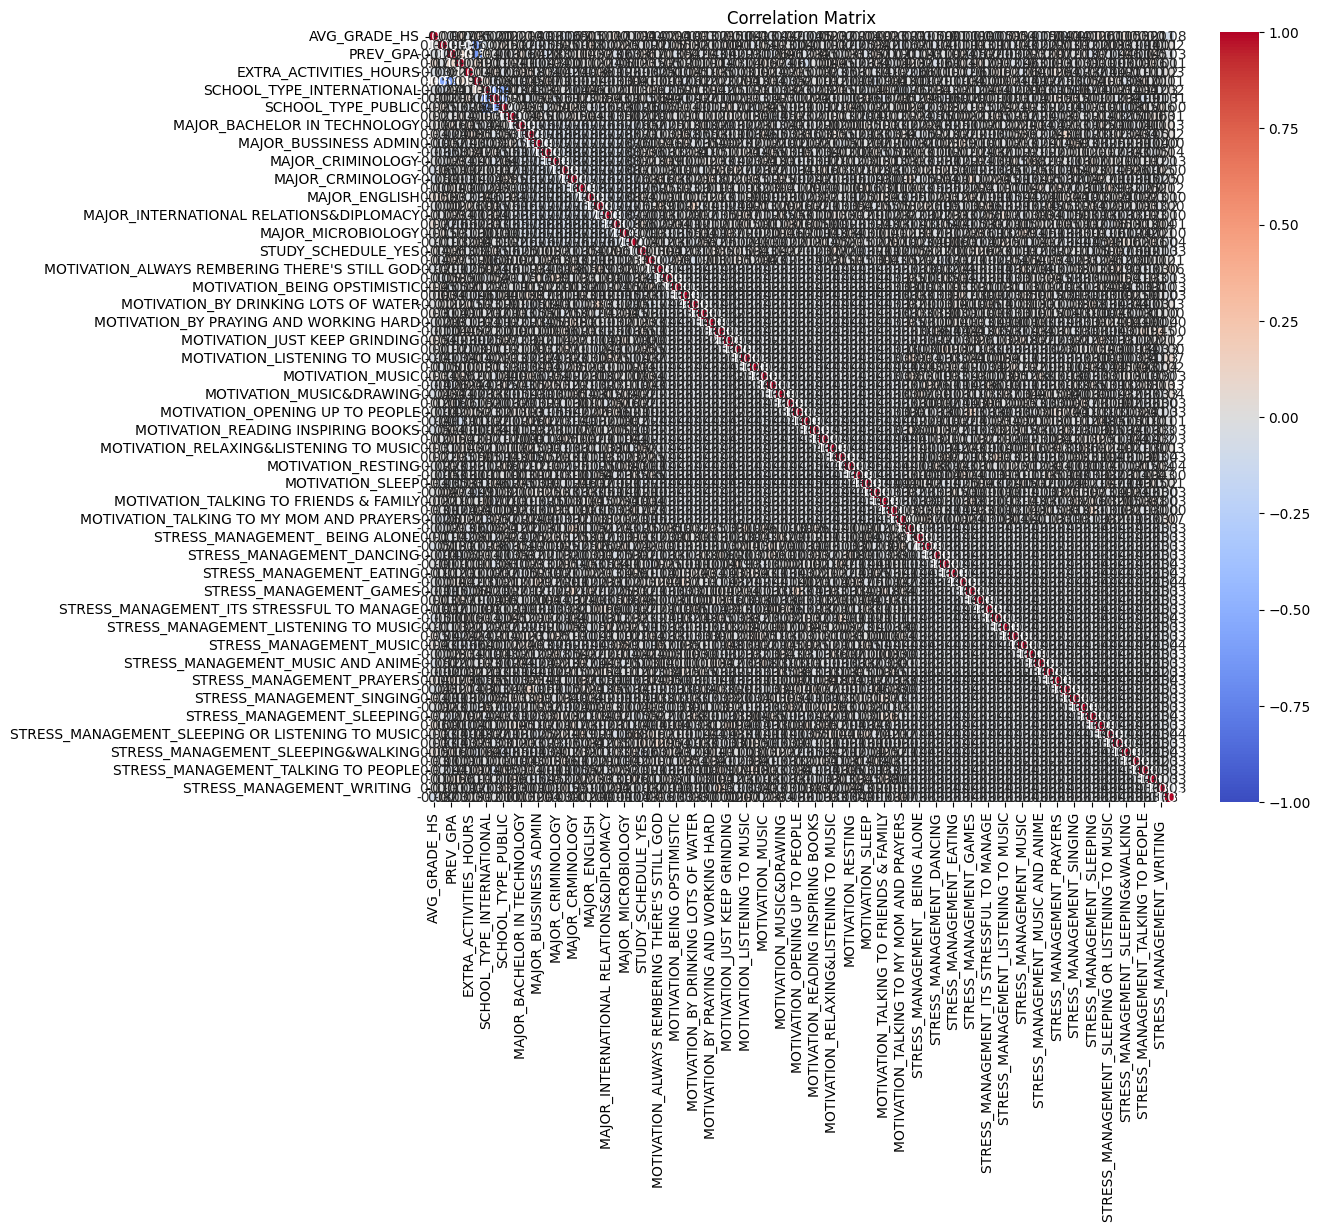

In [ ]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation of each feature with the target variable 'Degree Class'
degree_class_corr = corr_matrix['Degree'].sort_values(ascending=True)


In [ ]:
# Set display option to print all rows
# pd.set_option('display.max_rows', None)

# Print the correlations with 'Degree'
print("\nCorrelation with Degree Class:")
print(degree_class_corr)


Correlation with Degree Class:
PREV_GPA                                             -0.621875
GPA                                                  -0.542118
MOTIVATION_TAKEING EVERYTHING HAS A LESOON PROCESS   -0.092243
SCHOOL_TYPE_PRIVATE                                  -0.060930
MOTIVATION_BY ACKNOWLEDGING THE FUTURE               -0.060012
                                                        ...   
SCHOOL_TYPE_INTERNATIONAL                             0.064694
STRESS_MANAGEMENT_TALKING TO PEOPLE                   0.066495
MAJOR_COMPUTER SCIENCE                                0.072601
HOURS_STUDY                                           0.087519
Degree                                                1.000000
Name: Degree, Length: 86, dtype: float64


In [ ]:
X = dataset.drop(columns=['Degree'])
y = dataset['Degree']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


In [ ]:
# Inverse mapping for decoding
inverse_grade_mapping = {v: k for k, v in grade_mapping.items()}

# Decoding the 'GRADE_ENCODED' column back to original 'GRADE'
dataset['Degree'] = dataset['Degree'].map(inverse_grade_mapping)

In [ ]:
X = dataset.drop(columns=['Degree'])
y = dataset['Degree']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
feature_scores

PREV_GPA                                         179.454408
GPA                                               96.905475
STRESS_MANAGEMENT_MOVIES                           4.388576
HOURS_STUDY                                        4.174225
MOTIVATION_RESTING                                 3.143283
                                                    ...    
MOTIVATION_ALWAYS REMBERING THERE'S STILL GOD      0.153421
STRESS_MANAGEMENT_SINGING                          0.116276
STRESS_MANAGEMENT_WACHING MOVIES                   0.113815
STRESS_MANAGEMENT_MUSIC                            0.112161
STRESS_MANAGEMENT_DANCING                          0.107142
Length: 85, dtype: float64

In [ ]:
X = dataset.drop('Degree', axis=1)
y = dataset['Degree']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy for RandomForestClassifier model:", accuracy)


Model Accuracy for RandomForestClassifier model: 0.7904761904761904


In [ ]:
# Classification report
print("\nClassification Report for RandomForestClassifier model:")
print(classification_report(y_test, y_pred))


Classification Report for RandomForestClassifier model:
                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00         1
       First Class       0.00      0.00      0.00         1
              Pass       0.86      0.46      0.60        13
Second Class Upper       0.90      0.47      0.62        40
Second Class lower       0.71      0.96      0.82        80
       Third Class       0.86      0.85      0.86        75

          accuracy                           0.79       210
         macro avg       0.56      0.46      0.48       210
      weighted avg       0.81      0.79      0.77       210



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


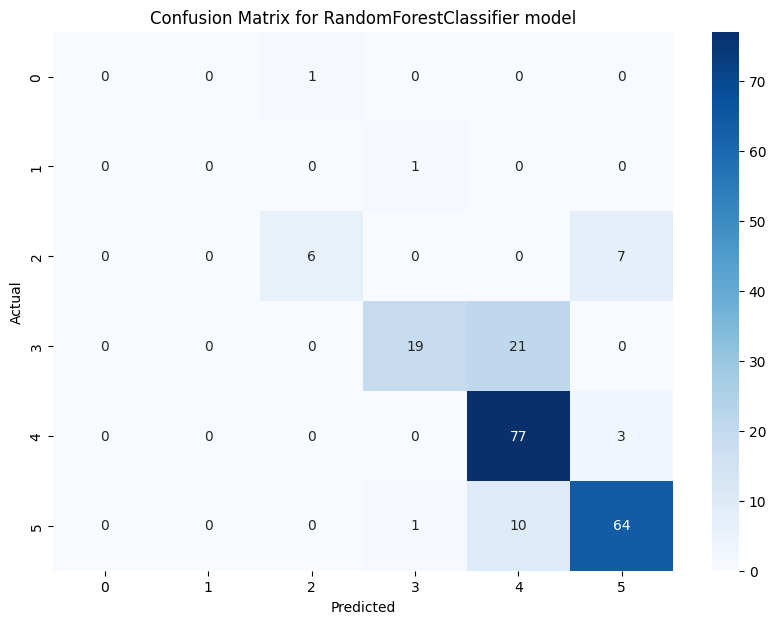

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

# Train a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Model Accuracy:", accuracy_log_reg)


Logistic Regression Model Accuracy: 0.4523809523809524


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report for Logistic Regression:
                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00         1
       First Class       0.00      0.00      0.00         1
              Pass       0.00      0.00      0.00        13
Second Class Upper       0.00      0.00      0.00        40
Second Class lower       0.43      0.95      0.59        80
       Third Class       0.59      0.25      0.36        75

          accuracy                           0.45       210
         macro avg       0.17      0.20      0.16       210
      weighted avg       0.37      0.45      0.35       210



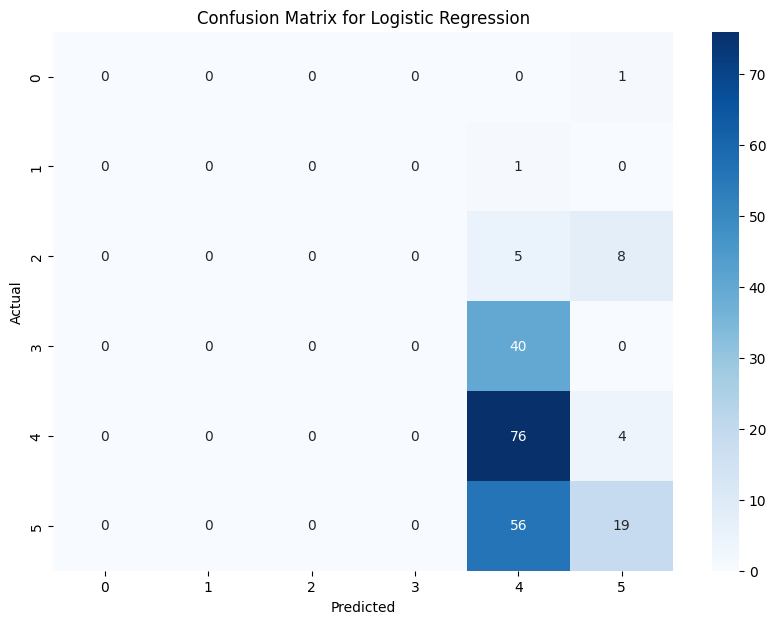

In [ ]:

# Classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

# Train a SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy:", accuracy_svm)


SVM Model Accuracy: 0.3619047619047619


In [ ]:
# Classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:
                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00         1
       First Class       0.00      0.00      0.00         1
              Pass       0.00      0.00      0.00        13
Second Class Upper       0.00      0.00      0.00        40
Second Class lower       0.36      0.89      0.52        80
       Third Class       0.33      0.07      0.11        75

          accuracy                           0.36       210
         macro avg       0.12      0.16      0.10       210
      weighted avg       0.26      0.36      0.24       210



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


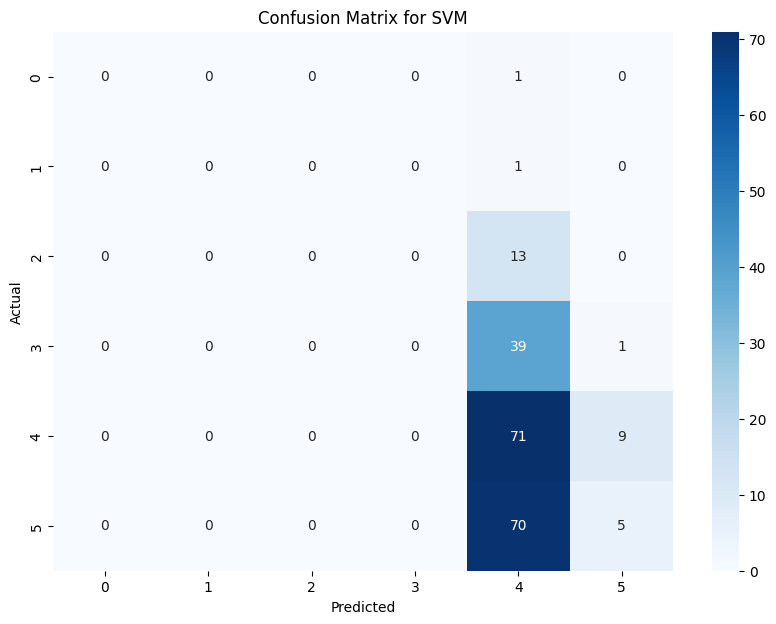

In [ ]:
# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train a k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nK-NN Model Accuracy:", accuracy_knn)


K-NN Model Accuracy: 0.38571428571428573


In [ ]:
# Classification report
print("\nClassification Report for K-NN:")
print(classification_report(y_test, y_pred_knn))




Classification Report for K-NN:
                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00         1
       First Class       0.00      0.00      0.00         1
              Pass       0.10      0.08      0.09        13
Second Class Upper       0.21      0.10      0.14        40
Second Class lower       0.42      0.69      0.52        80
       Third Class       0.43      0.28      0.34        75

          accuracy                           0.39       210
         macro avg       0.19      0.19      0.18       210
      weighted avg       0.36      0.39      0.35       210



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


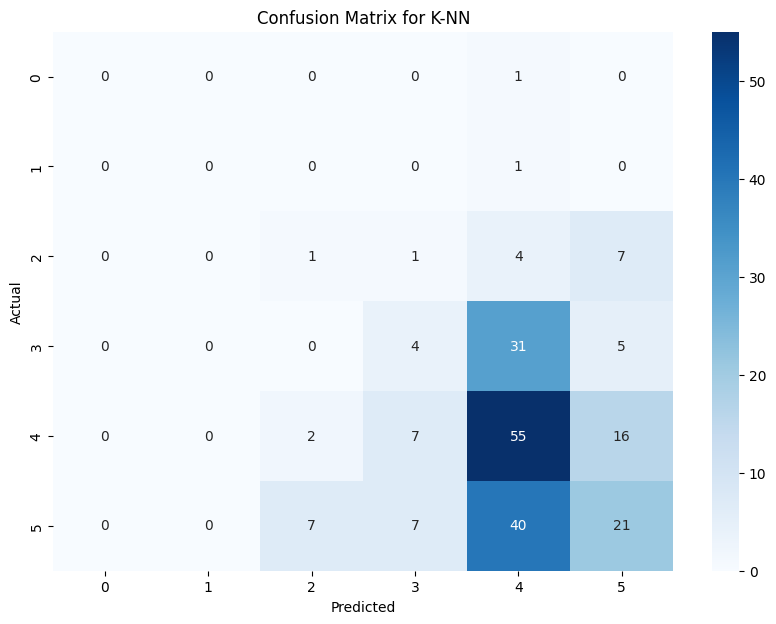

In [ ]:
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:


# Train a GradientBoosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Model Accuracy:", accuracy_gb)



Gradient Boosting Model Accuracy: 0.9238095238095239


In [ ]:
# Classification report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Classification Report for Gradient Boosting:
                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00         1
       First Class       1.00      1.00      1.00         1
              Pass       0.92      0.85      0.88        13
Second Class Upper       1.00      0.82      0.90        40
Second Class lower       0.88      0.97      0.92        80
       Third Class       0.95      0.95      0.95        75

          accuracy                           0.92       210
         macro avg       0.79      0.77      0.78       210
      weighted avg       0.92      0.92      0.92       210



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


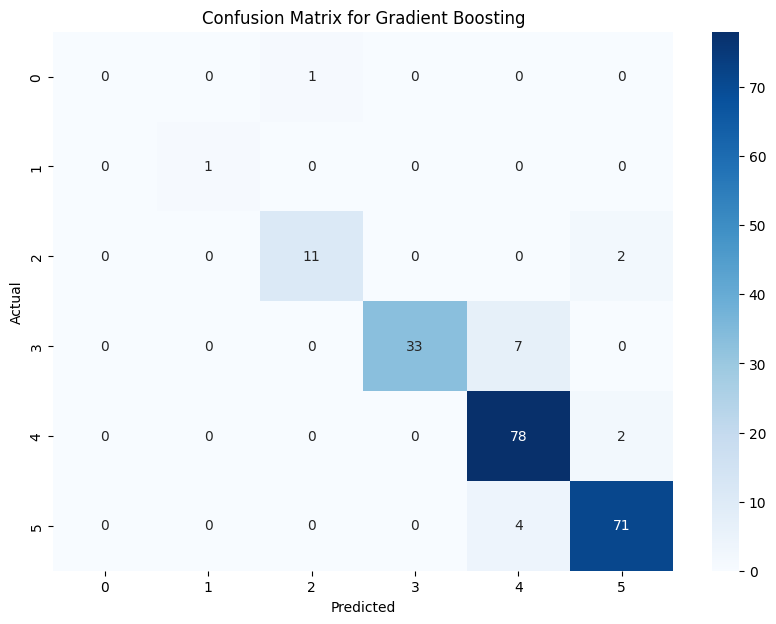

In [ ]:
# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:


# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Model Accuracy:", accuracy_dt)


Decision Tree Model Accuracy: 0.9476190476190476


In [ ]:
# Classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00         1
       First Class       1.00      1.00      1.00         1
              Pass       0.82      0.69      0.75        13
Second Class Upper       0.97      0.93      0.95        40
Second Class lower       0.94      0.99      0.96        80
       Third Class       0.97      0.97      0.97        75

          accuracy                           0.95       210
         macro avg       0.78      0.76      0.77       210
      weighted avg       0.95      0.95      0.95       210



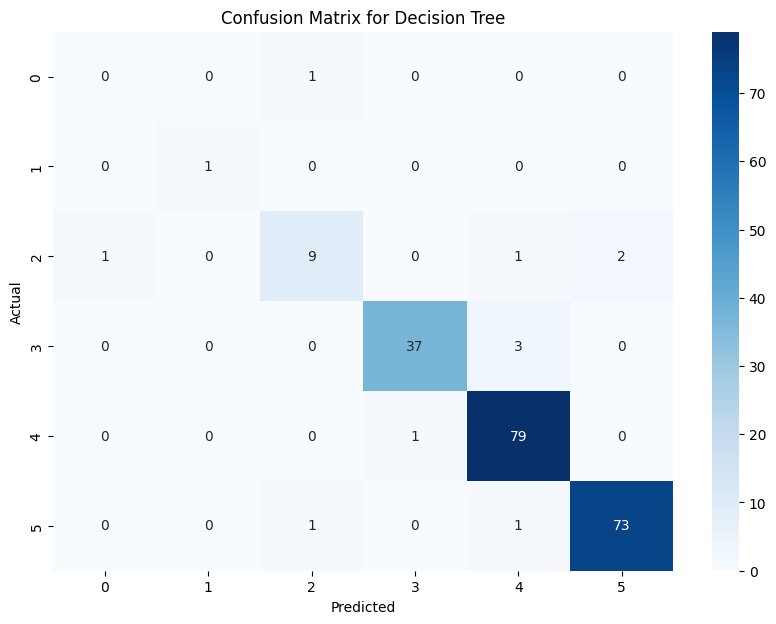

In [ ]:
# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
y_pred_dt

array(['Second Class lower', 'Second Class lower', 'Third Class',
       'Second Class lower', 'Second Class lower', 'Pass',
       'Second Class lower', 'Third Class', 'Second Class Upper',
       'Second Class lower', 'Second Class lower', 'Second Class lower',
       'Third Class', 'Pass', 'Second Class lower', 'Second Class Upper',
       'Third Class', 'Third Class', 'Second Class lower',
       'Second Class Upper', 'Second Class lower', 'Second Class lower',
       'Second Class lower', 'Third Class', 'Third Class',
       'Second Class lower', 'Second Class lower', 'Third Class',
       'Third Class', 'Third Class', 'Second Class lower',
       'Second Class Upper', 'Second Class lower', 'Third Class',
       'Second Class lower', 'Second Class lower', 'Second Class lower',
       'Third Class', 'Second Class lower', 'Second Class lower',
       'Second Class lower', 'Third Class', 'Third Class', 'Third Class',
       'Second Class lower', 'Pass', 'Second Class lower',
       '

In [ ]:
dataset['Degree'].unique()

array(['Second Class Upper', 'First Class', 'Second Class lower', 'Pass',
       'Third Class', 'Fail'], dtype=object)

In [ ]:
# Save the model and encoders
dump(model, 'degree_class_predictive_model.joblib')
dump(one_hot_encoder, 'one_hot_encoder.joblib')
dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']